In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
from scipy.signal import find_peaks
from scipy.optimize import curve_fit



# import lightkurve as lk
# from scipy.optimize import curve_fit

# from astropy.convolution import Gaussian1DKernel
# from astropy.convolution import convolve
sys.path.insert(0, "../")

from michael import janet

In [7]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

Making folder /Users/oliver hall/Research/unicorn/data/eleanor/5311109828992983168/...
Found star in Sector(s) 8 9 36
Most recent sector available =  49
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector 36...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1794k  100 1794k    0     0  1558k      0  0:00:01  0:00:01 --:--:-- 1558k


Calculating Cadences...
Assuring Quality Flags...
Making CBVs...


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4516k  100 4516k    0     0  2619k      0  0:00:01  0:00:01 --:--:-- 2618k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4159k  100 4159k    0     0  2762k      0  0:00:01  0:00:01 --:--:-- 2762k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4446k  100 4446k    0     0  2244k      0  0:00:01  0:00:01 --:--:-- 2244k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4516k  100 4516k    0     0  2952k      0  0:00:01  0:00:01 --:--:-- 2950k
  % Total    % Received % Xferd  Average Speed   Tim

Success! Sector 36 now available.


No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...


No postcard object will be created for this target.
No postcard object will be created for this target.
### Running Simple Astropy Lomb-Scargle on Sector 8 on star 5311109828992983168 ###
### Completed Simple Astropy Lomb-Scargle for Sector 8 on star 5311109828992983168 ###
### Saved results ###
### Running Wavelet Estimation for Sector 8 on star 5311109828992983168 ###


  0%|          | 0/71 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 8 on star 5311109828992983168 ###
### Saved results ###
### Running Composite ACF estimation for Sector 8 on star 5311109828992983168 ###
### Completed Composite ACF estimation for Sector 8 on star 5311109828992983168 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 9 on star 5311109828992983168 ###
### Completed Simple Astropy Lomb-Scargle for Sector 9 on star 5311109828992983168 ###
### Saved results ###
### Running Wavelet Estimation for Sector 9 on star 5311109828992983168 ###


  0%|          | 0/74 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 9 on star 5311109828992983168 ###
### Saved results ###
### Running Composite ACF estimation for Sector 9 on star 5311109828992983168 ###
### Completed Composite ACF estimation for Sector 9 on star 5311109828992983168 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 36 on star 5311109828992983168 ###
### Completed Simple Astropy Lomb-Scargle for Sector 36 on star 5311109828992983168 ###
### Saved results ###
### Running Wavelet Estimation for Sector 36 on star 5311109828992983168 ###


  0%|          | 0/75 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 36 on star 5311109828992983168 ###
### Saved results ###
### Running Composite ACF estimation for Sector 36 on star 5311109828992983168 ###
### Completed Composite ACF estimation for Sector 36 on star 5311109828992983168 ###
### Saved results ###
### Running ACF Estimation on star 5311109828992983168 ###
### Completed ACF Estimation on star 5311109828992983168 ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


/Users/oliver hall/Research/michael/Examples/../michael/methods.py:376: UserWarning: The highest peak in the ACF lies outside the period range of your search.
  warnings.warn("The highest peak in the ACF lies outside the period range of your search.")
/Users/oliver hall/Research/michael/Examples/../michael/validate.py:170: UserWarning: No estimates could agree. Please inspect the results carefully yourself.
  warnings.warn("No estimates could agree. Please inspect the results carefully yourself.")
/Users/oliver hall/Research/michael/Examples/../michael/validate.py:212: UserWarning: One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.
  warnings.warn("One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.")



------ Decoding Overall Period Flag 804 ------
512: One or more sectors disagrees strongly across all estimates with the others. This may indicate signal from a background star present in those sectors.
256: None of the 3 estimates agreed with one another to within 1 sigma. The CACF estimate is assumed to be the best in this case, if it is available.
32: The ACF period does not match the 'best' period within 2 sigma.
4: Best rotation is from the Composite Autocorrelation Function (CACF) method.

No other flags raised. 

### Saved results ###


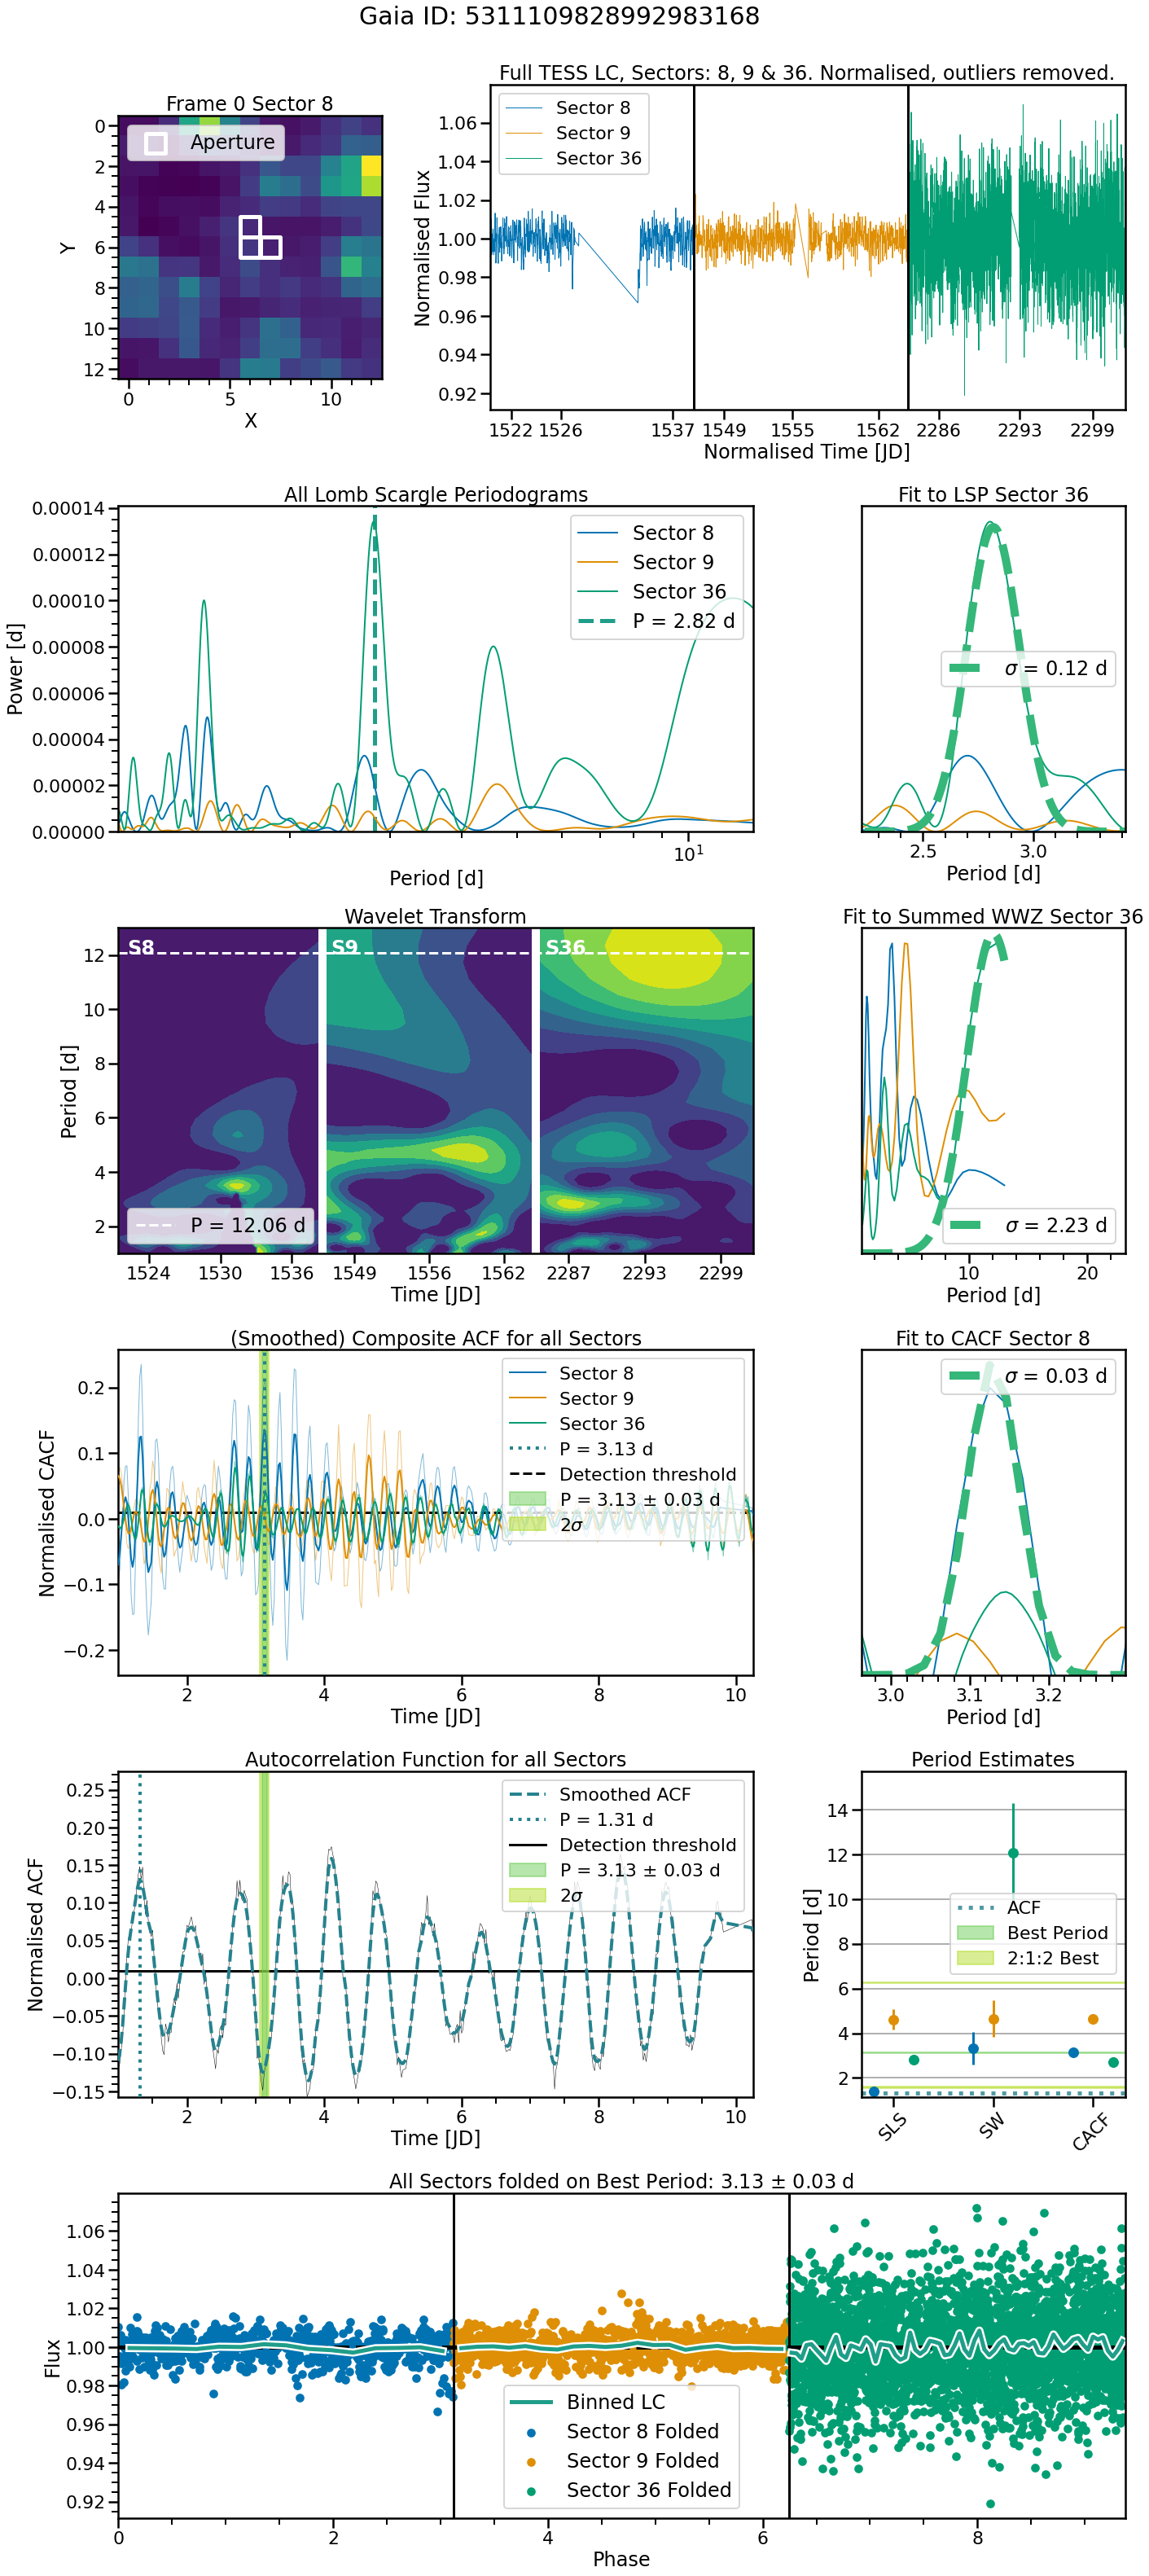

In [10]:
j = janet.boot(uni, index=2)
j.run(period_range = (1., 13.))

In [13]:
np.diff(np.diff(j.sectors))

array([26])

Just practice test this at first

In [15]:
j.results

,SLS,e_SLS,h_SLS,f_SLS,SW,e_SW,h_SW,CACF,e_CACF,h_CACF,ACF,s_SLS,s_SW,s_CACF,overall,e_overall,f_overall
8,1.382023,0.094928,0.000045,3.0,3.342489,0.728523,0.900000,3.129578,0.033384,0.148140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.616416,0.461642,0.000021,0.0,4.653941,0.832063,0.925176,4.652390,0.031521,0.106301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2.818161,0.119125,0.000132,0.0,12.063915,2.228403,1.031379,2.704398,0.025855,0.084833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.312536,NaN,NaN,NaN,NaN,NaN,NaN
best,2.818161,0.119125,0.000132,0.0,12.063915,2.228403,1.031379,3.129578,0.033384,0.148140,NaN,36,36,8,3.129578,0.033384,804.0


This is also a good prior target, lets stick with this one for a little bit.